In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



In [40]:
data= pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [41]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [42]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


Putting Quater Value 

In [43]:
data['quarter']=0
for i in range(0,42):
  p=data['Quarter'][i]
  data['quarter'][i]=p[0:2]

In [44]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


## Adding Value of t and tsquare along with log of square

In [45]:
data['t']= np.arange(1,43)
data['t-square']= data['t']**2
data['Sales_log']=np.log(data['Sales'])

In [46]:
data.head()

,Quarter,Sales,quarter,t,t-square,Sales_log
0,Q1_86,1734.827000,Q1,1,1,7.458663
1,Q2_86,2244.960999,Q2,2,4,7.716443
2,Q3_86,2533.804993,Q3,3,9,7.837477
3,Q4_86,2154.962997,Q4,4,16,7.675529
4,Q1_87,1547.818996,Q1,5,25,7.344602


## Creating Dummy Variables for Quarter

In [47]:
data[['Q1','Q2','Q3','Q4']]=pd.DataFrame(pd.get_dummies(data['quarter']))

In [48]:
data.head()

,Quarter,Sales,quarter,t,t-square,Sales_log,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,1,7.458663,1,0,0,0
1,Q2_86,2244.960999,Q2,2,4,7.716443,0,1,0,0
2,Q3_86,2533.804993,Q3,3,9,7.837477,0,0,1,0
3,Q4_86,2154.962997,Q4,4,16,7.675529,0,0,0,1
4,Q1_87,1547.818996,Q1,5,25,7.344602,1,0,0,0


## Visualisation

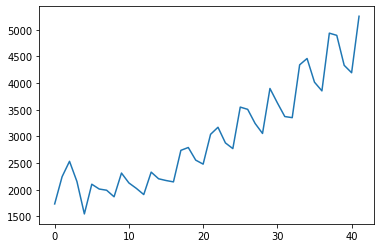

In [49]:
plt.plot(data['Sales'])

In [50]:
crosstab= pd.crosstab(data['quarter'],data['Sales'])
crosstab

Sales,1547.818996,1734.827000,1869.049999,1910.603996,1991.746998,2014.362999,2026.828999,2104.411995,2128.320000,2148.278000,...,3854.000000,3899.000000,4017.000000,4194.000000,4333.000000,4342.000000,4461.000000,4895.000000,4936.000000,5253.000000
quarter,,,,,,,,,,,,,,,,,,,,,
Q1,1,1,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
Q2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
Q3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
Q4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:xlabel='Sales'>

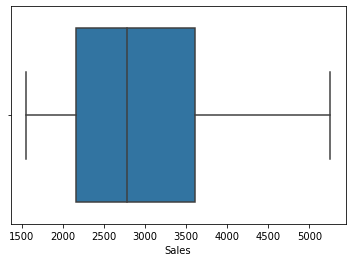

In [51]:
sns.boxplot(data['Sales'])

<AxesSubplot:ylabel='Density'>

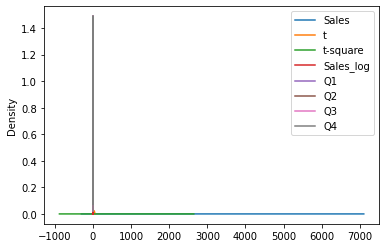

In [52]:
data.plot(kind='kde')

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'t-square'}>],
       [<AxesSubplot:title={'center':'Sales_log'}>,
        <AxesSubplot:title={'center':'Q1'}>,
        <AxesSubplot:title={'center':'Q2'}>],
       [<AxesSubplot:title={'center':'Q3'}>,
        <AxesSubplot:title={'center':'Q4'}>, <AxesSubplot:>]],
      dtype=object)

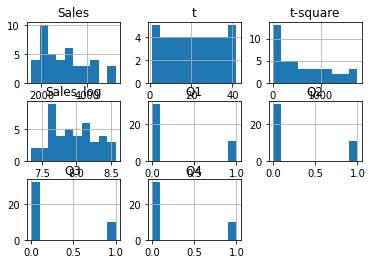

In [53]:
data.hist()

## Spliting the data into test and train

In [54]:
train_1=data.head(32)
test_1=data.tail(10)

In [55]:
train=train_1.drop(['Quarter','quarter'],axis=1)
test=test_1.drop(['Quarter','quarter'],axis=1)

In [56]:
train

,Sales,t,t-square,Sales_log,Q1,Q2,Q3,Q4
0,1734.827000,1,1,7.458663,1,0,0,0
1,2244.960999,2,4,7.716443,0,1,0,0
2,2533.804993,3,9,7.837477,0,0,1,0
3,2154.962997,4,16,7.675529,0,0,0,1
4,1547.818996,5,25,7.344602,1,0,0,0
5,2104.411995,6,36,7.651791,0,1,0,0
6,2014.362999,7,49,7.608058,0,0,1,0
7,1991.746998,8,64,7.596767,0,0,0,1
8,1869.049999,9,81,7.533186,1,0,0,0
9,2313.631996,10,100,7.746574,0,1,0,0


In [57]:
test

,Sales,t,t-square,Sales_log,Q1,Q2,Q3,Q4
32,3352.0,33,1089,8.117312,1,0,0,0
33,4342.0,34,1156,8.376090,0,1,0,0
34,4461.0,35,1225,8.403128,0,0,1,0
35,4017.0,36,1296,8.298291,0,0,0,1
36,3854.0,37,1369,8.256867,1,0,0,0
37,4936.0,38,1444,8.504311,0,1,0,0
38,4895.0,39,1521,8.495970,0,0,1,0
39,4333.0,40,1600,8.374015,0,0,0,1
40,4194.0,41,1681,8.341410,1,0,0,0
41,5253.0,42,1764,8.566555,0,1,0,0


## For the above series data we can use the following models
### 1) Linear Model
### 2) Exponential Model
### 3) Quadratic Model
### 4) Addative Seasonality and Quadratic
### 5) Multiplicative Seasonality 
### 6) ARIMA 
#### We shall then compare the error and implement the model with least error value

In [58]:
import statsmodels.formula.api as smf 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [59]:
# Linear
linear_model= smf.ols('Sales~t',data=train).fit()
linear_pred= pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767116

In [60]:
# Exponential
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [61]:
# Quadratic
quad_model =smf.ols("Sales~t+t-square",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t-square']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

752.9233932767116

In [62]:
# Addative Seasonality and Quadratic
model_1= smf.ols("Sales~t+t-square+Q1+Q2+Q3+Q4",data=train).fit()
model_1_pred= pd.Series(model_1.predict(test[['t','t-square','Q1','Q2','Q3','Q4']]))
model_1_rmse=np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(model_1_pred)))
model_1_rmse

673.4432892659145

In [63]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Sales_log~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1908.250394836114

### For ARIMA model we will use grid seach to find the best values of p and q

In [76]:
A=train['Sales'].values

In [81]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse  

In [80]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(A, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [82]:

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(A, p_values, d_values, q_values) 

ARIMA(0, 0, 0) RMSE=840.936
ARIMA(0, 0, 1) RMSE=617.890
ARIMA(0, 1, 0) RMSE=389.741
ARIMA(0, 1, 1) RMSE=396.142
ARIMA(1, 0, 0) RMSE=470.350
ARIMA(1, 1, 0) RMSE=387.223
Best ARIMA(1, 1, 0) RMSE=387.223


In [91]:
table=[['Linear Model',linear_rmse],['Exponential Model',exp_rmse],['Quadratic Model',quad_rmse],['Addative Seasonality and Quadratic',model_1_rmse],['Multiplicative Seasonality',rmse_Mult_sea],['ARIMA',387.223]]
table_up=pd.DataFrame(table,columns=['Model','rmse']).sort_values('rmse')
table_up

,Model,rmse
5,ARIMA,387.223000
3,Addative Seasonality and Quadratic,673.443289
0,Linear Model,752.923393
2,Quadratic Model,752.923393
4,Multiplicative Seasonality,1908.250395
1,Exponential Model,4387.940545


### From all the Models ARIMA has the lowest RMSE value
### Hence fiting the Arima model on data
### First we shall fit it on train and then on test and train together 

In [97]:
B=train['Sales'].values
B=B.astype('float32')

In [99]:
model= ARIMA(B,order=(1,1,0))
model_fit=model.fit()

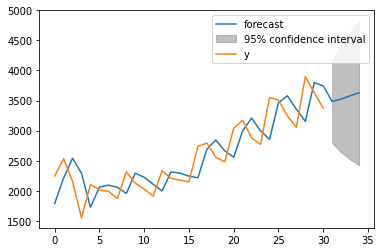

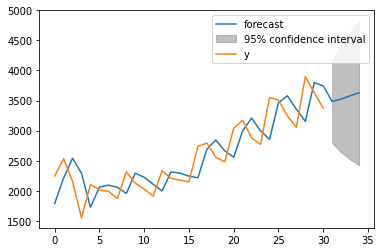

In [102]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,35) 

### Fitting the model on both test and train together

In [103]:
C= data['Sales'].values
C=C.astype('float32')

In [104]:
model_final=ARIMA(C,order=(1,1,0))
model_final_fit=model_final.fit()

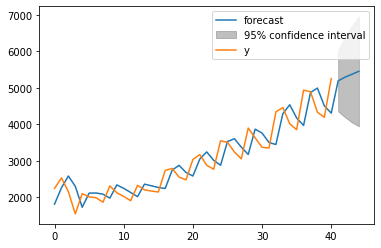

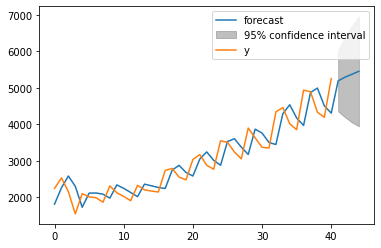

In [109]:
forecast_1=model_final_fit.forecast(steps=20)[0]
model_final_fit.plot_predict(1,45)

In [108]:
forecast_1

array([5191.68575546, 5293.97319081, 5372.36955293, 5454.25477519,
       5535.63051238, 5617.08065068, 5698.51992403, 5779.96078402,
       5861.4014123 , 5942.84207442])

## Conclusion:
1. Explore and Visualize the Series:
  * The data is univariate
  * The data when studied showed the highest sales is recorded in the second quarter. The first and the last quarter have the lowest sales
  * The data shows upward trend
  * The data also has multiplicative seasonality.
2. Preprocessing of the data
  * Created dummies for the quarter variable
  * We then transformed the data using t, tsquare, log transform as a part of model prep
  * We then partitioned the data into train,validate and future model
3. Model preperation:
  * We used 6 Model based forecasting methods.Linear Model, Exponential Model, Quadratic Model, Multiplicative Seasonality, Addative Seasonality and Quadratic, ARIMA	
  * Based on the RMSE value we choose the best model
  * Model----------------->rmse
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  ARIMA----------------->387.223000
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Addative Seasonality and Quadratic----------------->673.443289
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Linear Model----------------->752.923393
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Quadratic Model----------------->752.923393
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Multiplicative Seasonality----------------->1908.250395
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	 Exponential Model----------------->4387.940545
  
  * As Arima had the least rmse value we choose arima for forecasting the data for passengers
  * We have predicted / forecasted value of sales for the next 10 quarters
  
